In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
explore = pd.read_csv('food_7.csv', index_col=[0])
explore.head(2)

,code,product_name,nutrition_grade_fr,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
1,4530,Banana Chips Sweetened (Whole),d,2243.0,28.57,64.29,14.29,3.57,0.000,0.0,0.0214,0.000,0.00129
2,4559,Peanuts,b,1941.0,17.86,60.71,17.86,17.86,0.635,0.0,0.0000,0.071,0.00129


In [4]:
apport = pd.read_csv('food_apport.csv')
apport

,Population,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,Femme_20_40,2200,70,200,30,60,5,0.0006,0.11,0.9,0.016
1,Homme_20_40,2700,85,245,30,73,5,0.0008,0.11,0.9,0.009
2,Femme_41_60,2000,63,180,30,55,5,0.0006,0.11,1.2,0.009
3,Homme_41_60,2500,80,230,30,68,5,0.0008,0.11,0.9,0.009


1. - Analyse de variation centrale des variables et son utilisation:
    - la valeur moyenne d’une variable nutriment (100g) représente la valeur moyenne du nutriment apportée par l’ensemble des produits en 100g.  La division de cette moyenne par la valeur journalière conseillée du nutriment représente le niveau de contribution (en pourcentage) moyenne des produits en 100g à l’apport journalier conseillé du nutriment.  On obtient donc la distribution des niveau de contribution des variables.

In [5]:
explore_num = explore.drop(['code','product_name','nutrition_grade_fr' ], axis = 1)

In [6]:
M_x=explore_num.mean()
M_x

energy_100g           961.445559
fat_100g                9.715195
carbohydrates_100g     29.982527
sugars_100g            12.015580
proteins_100g           6.017535
salt_100g               0.774004
vitamin-a_100g          0.000228
vitamin-c_100g          0.008154
calcium_100g            0.073279
iron_100g               0.002453
dtype: float64

In [7]:
R_x=apport.mean()
R_x

energy_100g           2350.00000
fat_100g                74.50000
carbohydrates_100g     213.75000
sugars_100g             30.00000
proteins_100g           64.00000
salt_100g                5.00000
vitamin-a_100g           0.00070
vitamin-c_100g           0.11000
calcium_100g             0.97500
iron_100g                0.01075
dtype: float64

In [8]:
MC_x = M_x/R_x
MC_x

energy_100g           0.409126
fat_100g              0.130405
carbohydrates_100g    0.140269
sugars_100g           0.400519
proteins_100g         0.094024
salt_100g             0.154801
vitamin-a_100g        0.325402
vitamin-c_100g        0.074125
calcium_100g          0.075158
iron_100g             0.228196
dtype: float64

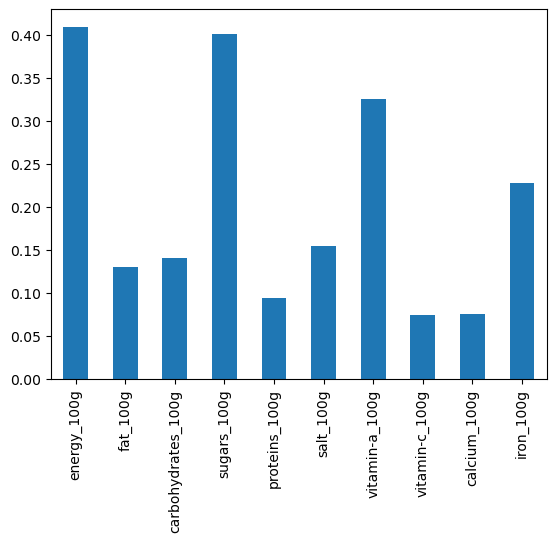

In [9]:
MC_x.plot(x='nutriment', y='MC_x', kind='bar')
plt.show()

Le niveau moyen de contribution (MC_x) à la valeur journalière par chaque nutriment en 100g est variable:  de 7% pour calcium et vitamine c au plus de 40% pour sucre et energy, tandis que pour vitamine a et fer, le niveau est environs 19%, soit la moyenne globale (MC_global).  
L'objectif est d'aider à équilibrer l'apport des produits en calculant un score apport (Score_apport_y) du produit y : plus le score est faible, plus le produit contribue à l'équilibrer l'apport, plus le score est élévé, plus il contribue à deséquilibrer l'apport. Le score est calculé à partir de sous score de chaque nutriment (score_xy):  

 - si le niveau moyen (MC_x) est au dessus de la moyenne globale (MC_global), le facteur de correction (FC_x) pour ce nutriment est positive:   le niveau de contribution (MC_xy) supérieur à la moyenne global (MC_global) donne une sous-core apport positive et  le niveau de contribution inférieur à la moyenne globale donne un sous-score négative. 
- si le niveau moyen (MC_x) est identique la moyenne globale (MC_global), le facteur de correction est nul:  le sous score apport est la distance entre le niveau de contribution (MC_xy) par rapport à la moyenne global (MC_global). 
- si le niveau moyen (MC_x) est inférieure à la moyenne globale (MC_global), le facteur de correction est négative:  le niveau de contribution (MC_xy) supérieur à la moyenne global (MC_global) donne une sous-core apport négative  et  le niveau de contribution inférieur à la moyenne globale donne un sous-score positive. 
    MC_x = la moyenne de x/la moyenne journalière conseillé de x
    FC_x = MC_x/MC_global - 1
    MC_xy = la valeur x du produit y/la moyenne journalière conseillé de x
    Score_xy = (MC_xy - MC_global) * FC_x
    Score_x = Total(Score_xy)

In [10]:
MC_global = MC_x.mean()
MC_global

0.20320249198275508

In [11]:
FC_x = MC_x/MC_global - 1
FC_x

energy_100g           1.013390
fat_100g             -0.358250
carbohydrates_100g   -0.309708
sugars_100g           0.971036
proteins_100g        -0.537289
salt_100g            -0.238194
vitamin-a_100g        0.601368
vitamin-c_100g       -0.635218
calcium_100g         -0.630130
iron_100g             0.122996
dtype: float64

In [12]:
explore_num['score_apport'] = 0
explore_num.head(2)

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,score_apport
1,2243.0,28.57,64.29,14.29,3.57,0.000,0.0,0.0214,0.000,0.00129,0
2,1941.0,17.86,60.71,17.86,17.86,0.635,0.0,0.0000,0.071,0.00129,0


In [13]:
for i, row in explore_num.iterrows():
    score_xy = 0
    for x in explore_num.columns[:-1] : 
        C_xy = row[x]/R_x[x]
        if FC_x[x] == 0 :
            score_xy += abs(C_xy - MC_global)
        else : 
            score_xy += (C_xy - MC_global)* FC_x[x]
    explore_num.at[i, 'score_apport'] = score_xy

In [14]:
explore_num.to_csv('explore_num.csv')

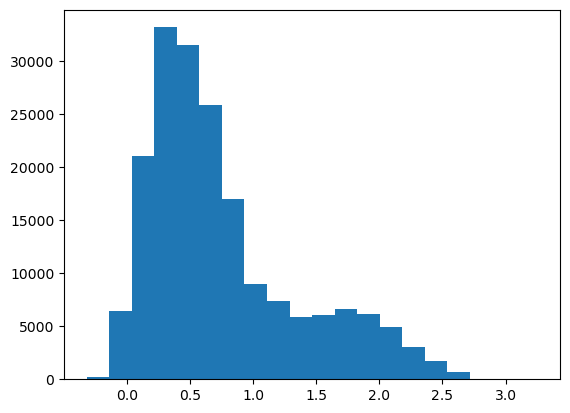

In [15]:
plt.hist(explore_num['score_apport'], bins=20)
plt.show()

In [16]:
def condition(x):
    if x < 0:
        return "a"
    elif x>=0 and x<0.5:
        return "b"
    elif x>=0.5 and x<1:
        return "c"
    elif x>=1 and x<2:
        return "d"
    else:
        return "e"
explore_num['apport_grade'] = explore_num['score_apport'].apply(condition)

<AxesSubplot:ylabel='apport_grade'>

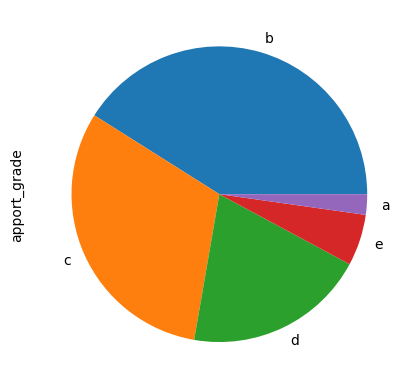

In [17]:
explore_num['apport_grade'].value_counts(normalize=True).plot(kind='pie')

2.1 Analyse bivariée, Etude de la corrélation linéaire entre "score_apport" et les nutriments

In [18]:
correlation = MC_x.copy()

In [19]:
explore_num.head(2)

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,score_apport,apport_grade
1,2243.0,28.57,64.29,14.29,3.57,0.000,0.0,0.0214,0.000,0.00129,1.060458,d
2,1941.0,17.86,60.71,17.86,17.86,0.635,0.0,0.0000,0.071,0.00129,1.029944,d


In [20]:
for x in explore_num.columns[:-2]: 
     correlation[x] = stats.pearsonr(explore_num[x],explore_num["score_apport"])[0]
correlation

energy_100g           0.666638
fat_100g              0.438980
carbohydrates_100g    0.602051
sugars_100g           0.926069
proteins_100g        -0.072644
salt_100g            -0.156927
vitamin-a_100g        0.119809
vitamin-c_100g       -0.012447
calcium_100g          0.071342
iron_100g             0.194721
dtype: float64

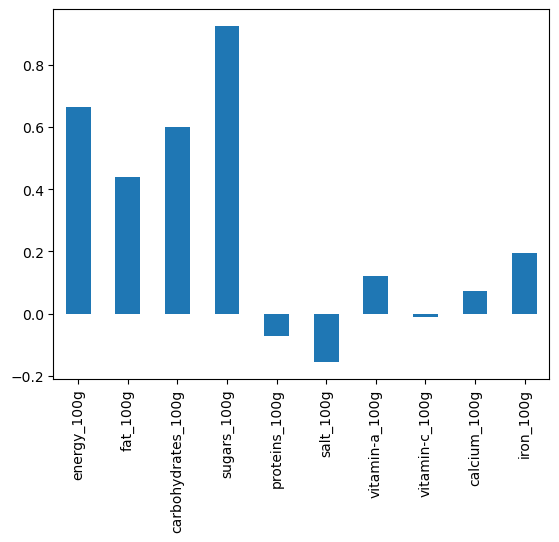

In [21]:
correlation.plot(x='nutriment', y='correlation', kind='bar')
plt.show()

Explication:  Il y a une forte corrélation positive entre score_apport et sugar_100g, energy_100g, ce qui valide le fait que plus sugar_100g, energy_100g est important dans le produit, plus son score_apport sera grand.  

2.2 Analyse bivariée ANOVA entre nutri_score et score_apport

In [22]:
explore_num["nutrition_grade_fr"] = explore["nutrition_grade_fr"]

In [23]:
#explore_num = explore_num.drop(["nutrition-score-fr_100g"], axis = 1)

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='score_apport'>

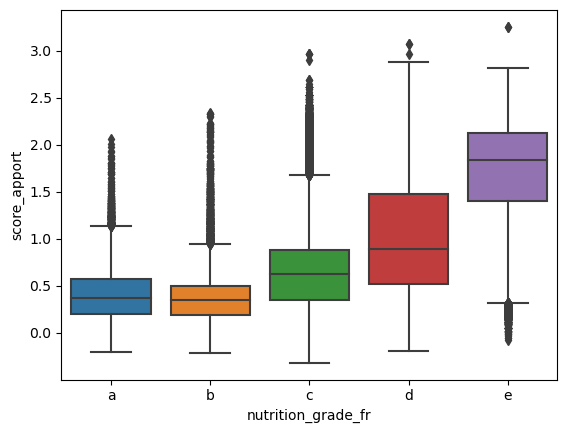

In [24]:
sns.boxplot(x='nutrition_grade_fr', y='score_apport', data=explore_num, order=['a', 'b', 'c', 'd', 'e'])

Explication boxplot:  Il y a une certaine corrélation positive entre score_apport et nutri_score, c'est à dire leur tendance se convergent. Q2, Q3 de score_apport augmente quand nutri-score passe de 'a' à 'e'. Mais il y a beaucoup d'exceptions avec Q1 et Q4 de chaque nutri qui couvre une large plage de valeur de score_apport et beaucoup outliers. 

Passons à ANOVA pour quantifier cette corrélation: 

-0.7819055368083184


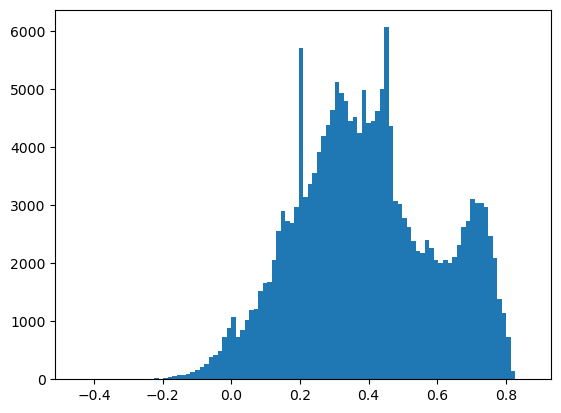

In [25]:
# Apply  Box-Cox transformation pour normaliser score_apport
transformed_data, lambda_value = stats.boxcox(explore_num['score_apport']+1)

print(lambda_value)

plt.hist(transformed_data, bins=100)
# Replace the original column with the transformed data
explore_num['score_apport_tx'] = transformed_data

In [26]:
X = "nutrition_grade_fr" # qualitative
Y = "score_apport_tx" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),'moyenne_classe': yi_classe.mean()})
        SCT = sum([(yj-moyenne_y)**2 for yj in y])
        SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(explore_num[X],explore_num[Y])

0.3407341974294713

Explication ANOVA:  La corrélation entre nutri-score et score_apport est très moyenne avec une valeur 0.34.  

3. ACP et objectives :  trouver les composantes synthètiques et leurs significations, et les utiliser pour conseils en produits. 

3.1 Séparer les données en  produits, valeurs et nutriments

In [27]:
#explore = explore.set_index('product_name')

In [28]:
cols = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'score_apport'] 

In [29]:
df = explore_num[cols]

In [30]:
df.head()

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,score_apport
1,2243.0,28.570000,64.29,14.290000,3.57,0.000000,0.000000,0.021400,0.000000,0.001290,1.060458
2,1941.0,17.860000,60.71,17.860000,17.86,0.635000,0.000000,0.000000,0.071000,0.001290,1.029944
4,1552.0,1.430000,77.14,15.963943,8.57,1.589298,0.000397,0.013371,0.101864,0.003654,1.159265
5,1933.0,18.270000,63.46,11.540000,13.46,1.589298,0.000397,0.013371,0.038000,0.003460,1.117219
6,1490.0,12.670762,80.00,15.963943,8.89,1.589298,0.000397,0.002700,0.044000,0.003654,1.170663


In [31]:
#products = df.index

In [32]:
X = df.values

In [33]:
nutriments = df.columns
nutriments

Index(['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'score_apport'],
      dtype='object')

3.2 Scaler les données

In [34]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [35]:
pd.DataFrame(X_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10
count,186768.00,186768.00,186768.00,186768.00,186768.00,186768.00,186768.00,186768.00,186768.00,186768.00,186768.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.34,-0.89,-1.18,-0.88,-1.06,-0.98,-1.20,-1.15,-1.54,-1.58,-1.78
25%,-0.93,-0.87,-0.90,-0.76,-0.89,-0.88,-1.20,-1.15,-1.04,-1.00,-0.72
50%,-0.17,-0.38,-0.25,-0.45,-0.23,-0.23,0.89,0.74,0.60,0.77,-0.30
75%,0.82,0.49,0.86,0.35,0.53,0.63,0.89,0.74,0.60,0.77,0.44
max,3.70,3.37,2.76,2.94,3.16,3.49,4.04,3.56,2.97,3.47,4.15


Explication:   les données sont bien scalées avec mean = 0 et std = 1

3.3 ACP calcul et analyse 

a) Calcul

In [36]:
n = 6
pca = PCA(n_components=n)
pca.fit(X_scaled)
#pca.fit_transform(X_scaled)

PCA(n_components=6)

b) choix de nombre de composants

In [37]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.61, 24.38, 15.74,  7.21,  6.48,  5.3 ])

In [38]:
scree_cum = scree.cumsum().round()
scree_cum

array([31., 55., 71., 78., 84., 90.])

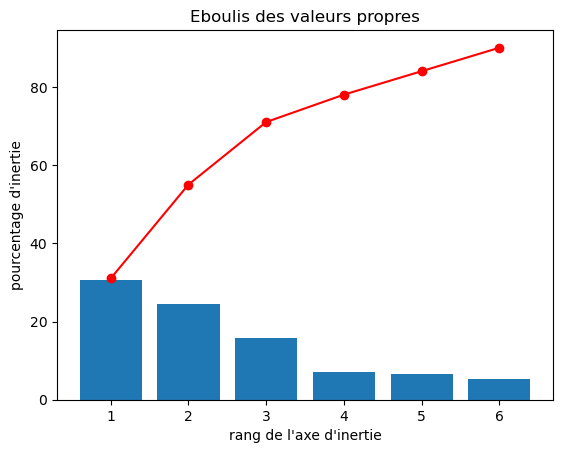

In [39]:
x_list = range(1, n+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

Explication: on choisit 4 composants, on couvre 77% de variances, on analyse F1, F2, F3, F4 seulement par la suite, on les intégre dans explore_num 

c) analyse des composants

In [40]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = nutriments
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,score_apport
F1,0.50,0.37,0.43,0.40,0.12,0.04,-0.12,-0.16,-0.05,0.04,0.46
F2,0.02,0.03,0.00,0.09,-0.03,-0.09,0.54,0.47,0.43,0.49,0.19
F3,0.21,0.29,-0.04,-0.39,0.58,0.52,0.02,-0.00,0.11,0.17,-0.28
F4,-0.03,0.37,-0.35,0.16,-0.46,0.57,0.14,0.23,-0.17,-0.24,0.11
F5,-0.01,0.46,-0.50,0.08,0.14,-0.40,-0.06,-0.22,0.48,-0.26,0.02
F6,-0.18,-0.37,0.07,0.26,-0.06,0.48,-0.08,-0.38,0.60,-0.03,0.08


<AxesSubplot:>

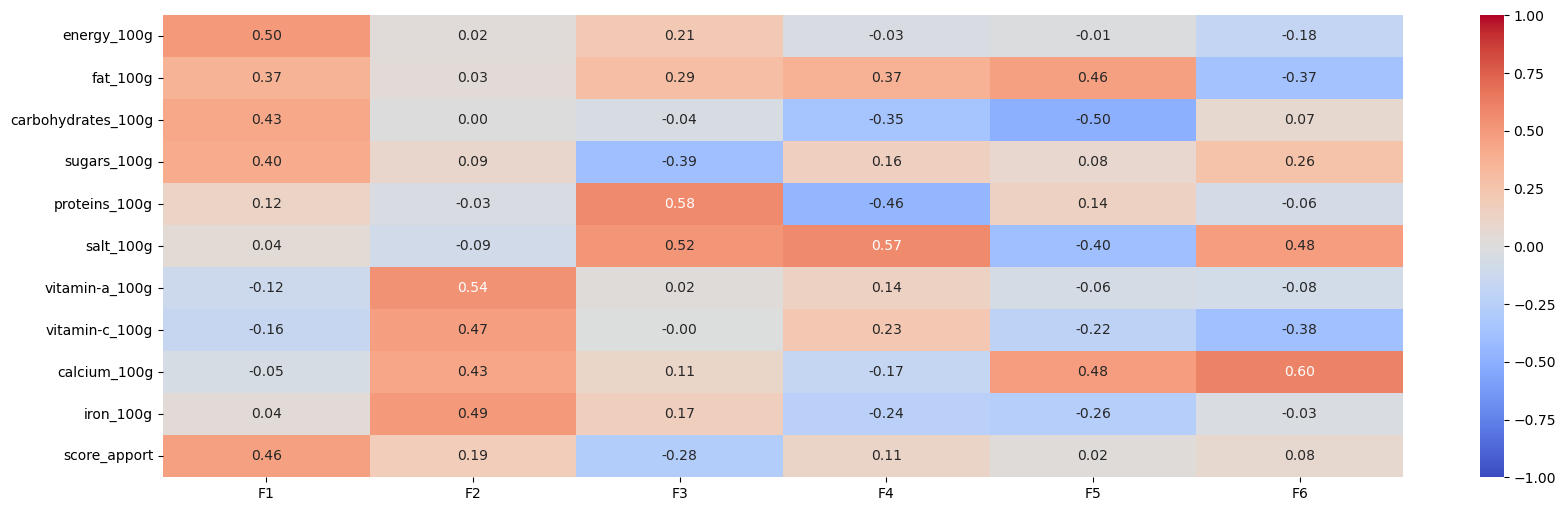

In [41]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Explication de heatmap:   On peut constater que 
F1 représente l'axe Energie avec sugars, energy, cabohydrate et fat.  
F2 représente l'axe vitamine et minéraux. 
F3 est anti sucre et représente bien le protéin.   
F4 représente bien sel et intégre aussi les vitamines. 
Pour le score_apport,   F1 contribue à la hausse, F3 contribue à la baisse. 

In [42]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.05,
                head_length=0.05, 
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.03,
                pca.components_[y, i] + 0.03,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

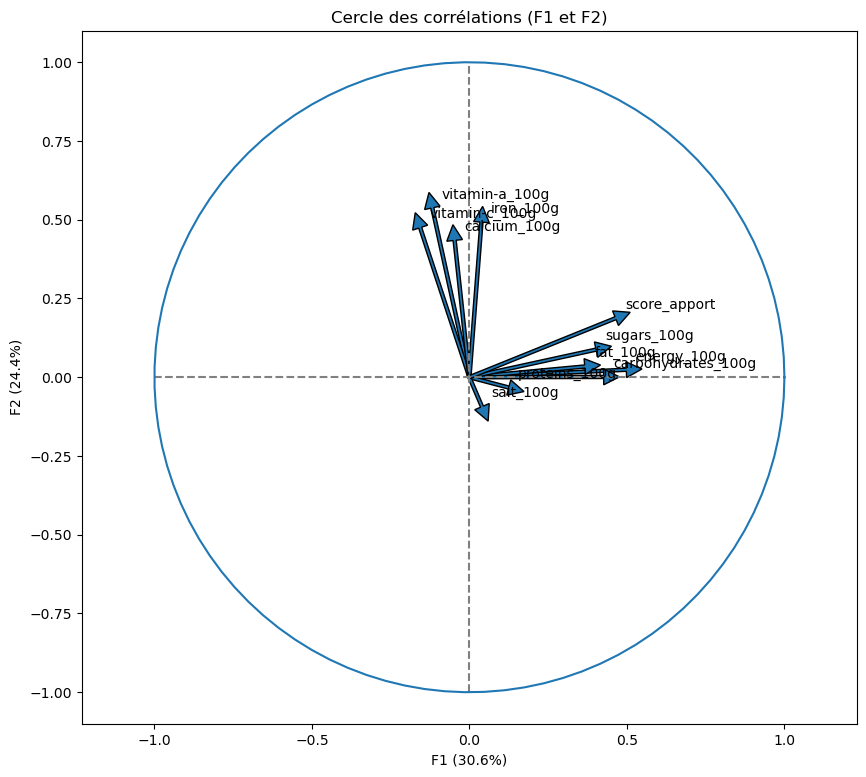

In [43]:
x_y = (0,1)
correlation_graph(pca, x_y, nutriments)

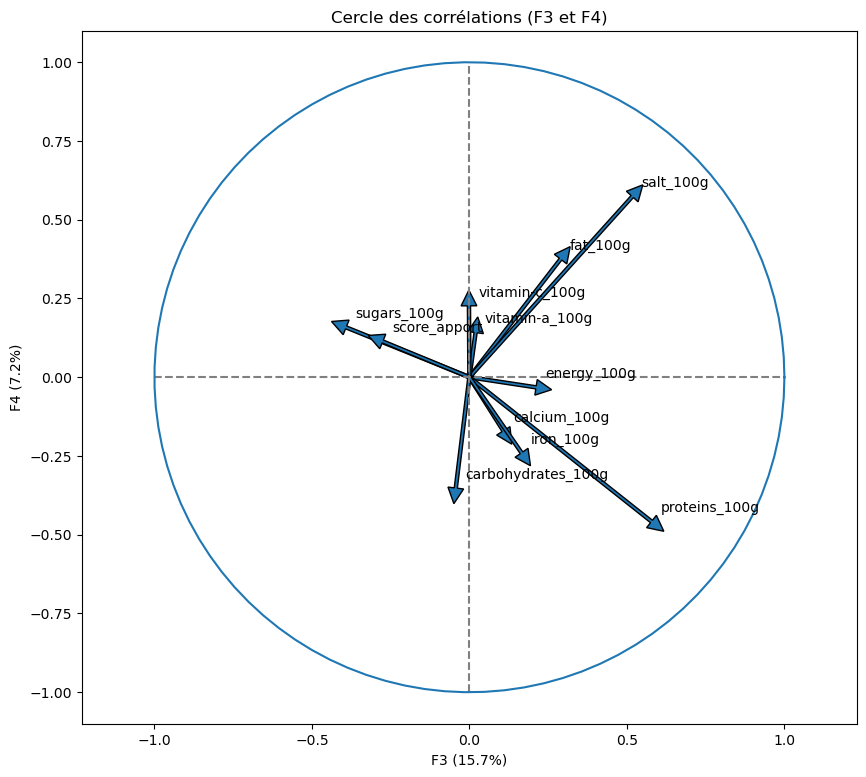

In [44]:
correlation_graph(pca, (2,3), nutriments)

Explication de cercle de corrélation:  Le cercle de corrélation donne l'interprétation de F1, F2, F3 et F4 similaire au heatmap, mais avec une information corrélation en compléments: 
F1 représente l'axe Energie avec sugars, energy, cabohydrate et fat, avec l'ordre de corrélation: carbohydrate > energy > fat sugars.   
F2 représente l'axe vitamine et minéraux avec l'ordre de corrélation:  iron > calcium > vitamine_a > vitamine_c   
F3 est anti sucre et représente bien le protéin: F3 et protéin est moyennement corrélés
F4 représente bien sel et intégre aussi les vitamines: bien 

D'autres informations complémentaires ici sont les corrélations entre les variables :  
1) sur le plan F1/F2, score_apport est assez corrélé avec sugars, energy, carbohydrate et fat, ce qui est conforme à notre analyse bivariée en section 2.1  
2) les vitamine_c et vitamine_a sont fortement corrélé, car ils sont corrélé aussi bien sur le plan F1/F2 et sur le plan F3/F4. 
3) les minéraux iron et calcium sont aussi fortementcorrélés sur F1/F2 et sur F3/F4. 

ON etudie la projection des score_apport sur les plan F1/F2 et F3/F4

In [45]:
X_proj = pca.transform(X_scaled)

In [46]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

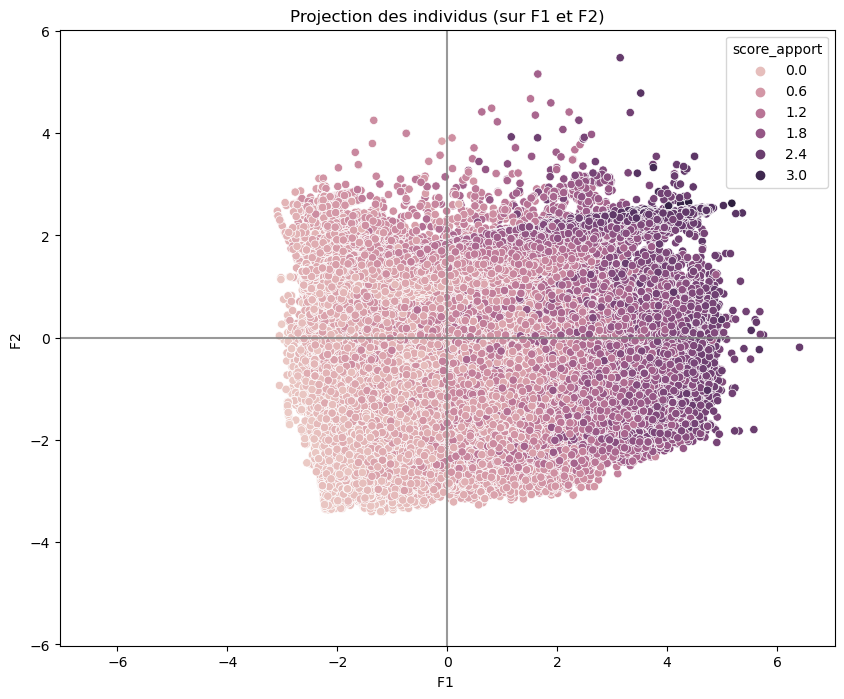

In [47]:
display_factorial_planes(X_proj, (0,1), clusters=df['score_apport'])

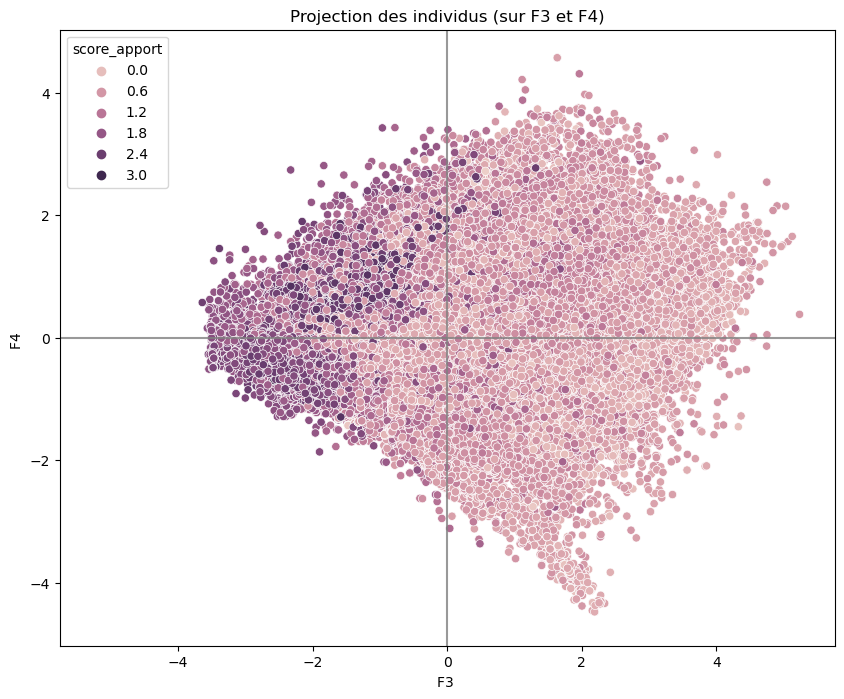

In [48]:
display_factorial_planes(X_proj, (2,3), clusters=df['score_apport'])

Explication de projection : par rapport au heatmap, la projection donne une vision plus précise de la relation entre Fx et score_apport: score_apport est important dans la zone où F1 > 2 et F2 > -1. Egament dans la zone où F3 < -2.   Par contre, il est indépendant de F4. 